<a href="https://colab.research.google.com/github/SemilleroNeuroCo/EEG-DATA/blob/master/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmos de clasificación en el conjunto de datos de Iris: kNN, SVM, Random forest**

El conjunto de datos del iris consiste en mediciones de tres especies diferentes de flor iris: setosa, versicolor, virginica.

In [3]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [4]:
# Importar dataset Iris
from sklearn.datasets import load_iris
# Cargar el dataset Iris de la librería de scikitlearn, guardar en la variable "iris" y mostrar la información que consideren relevante e.g. target, features, etc
#
#
#
#

Text(0.5, 1.0, 'Iris classification according to Sepal measurements')

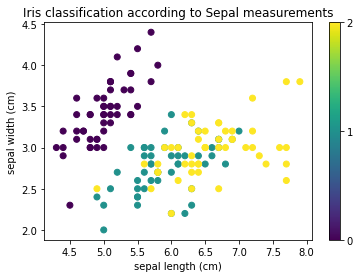

In [5]:
# Gráfica del dataset según 2 características
x_index = 0 #Sepal Length
y_index = 1 #Sepal Width
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title("Iris classification according to Sepal measurements")

**K-Nearest Neighbors Classifier**

In [7]:
from sklearn import neighbors
#Generar el modelo de k Nearest Neighbor con solo 1 vecino, guardar en la variable "knn" y entrenar
#
#

In [6]:
# Predicción usando knn:  Cual es la clase para una flor de las siguientes caracteristicas: 3cm (length)x 5cm (width) sepalo y 4cm x 2cm petalo?
#
#

In [ ]:
# Gráfica de la región de clasificación según las medidas de sépalos.Primero, ajustemos el modelo usando solo las dos primeras características:
X = iris.data[:, :2] 
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Matriz de datos de entrada que contenga valores continuos de longitud y ancho de sépalos (de mínimo a máximo) y aplicar la función de predicción:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 #min and max sepal length
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1 #min and max sepal width
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'K-Nearest Neighbors k=3')

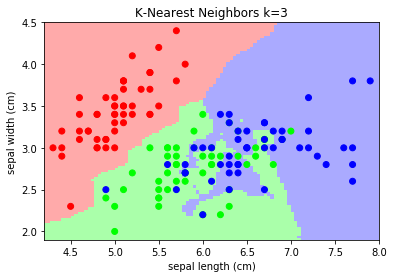

In [ ]:
# Gráfica
plt.figure()

# Crear mapas de colores para problemas de clasificación de 3 clases
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Mapa de clasificación 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('K-Nearest Neighbors k=3')

**Support Vector Machine Classifier**

In [ ]:
from sklearn import svm
# Generar el modelo (linear svc), guardar en la variable "clf" y entrenar
#

In [8]:
# Entrenar modelo
#

In [ ]:
# Predicción usando svm: Cual es la clase para una flor de las siguientes caracteristicas: 3cm x 5cm sepalo y 4cm x 2cm petalo?
result = clf.predict([[3, 5, 4, 2]])
print (iris.target_names[result])

['virginica']


In [ ]:
# Explorando diferentes clasificadores (kernels).Primero, ajustemos el modelo usando solo las dos primeras características:
#X = ?? 
y = iris.target

In [13]:
def plot_class_map(clf, X, y, title="", **params):   # Función para graficar las regiones de clasificación
    
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()

    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    plt.title(title)

# Linear
clf = svm.SVC(kernel='linear')
plot_class_map(clf, X, y, 'SVC with linear kernel')

# RBF
clf = svm.SVC(kernel='rbf')
plot_class_map(clf, X, y, 'SVC with RBF kernel')

# Polinómico
clf = svm.SVC(kernel='poly', degree=3)
plot_class_map(clf, X, y, 'SVC with polynomial kernel (3 degrees)')

NameError: ignored

In [ ]:
#Nota: Los modelos lineales LinearSVC () y SVC (kernel = 'linear') producen límites de decisión ligeramente diferentes
clf2 = svm.SVC(kernel="linear")
clf2.fit(iris.data, iris.target)
result = clf2.predict([[3, 5, 4, 2],])# What is the iris class for 3cm x 5cm sepal and 4cm x 2cm petal?
print (iris.target_names[result])

['versicolor']


**Random forest**

In [9]:
from sklearn.tree import DecisionTreeClassifier
# Generar el modelo, guardar en la variable "rdm" y entrenar
#
#

In [11]:
# Predicción usando random forest: Cual es la clase para una flor de las siguientes caracteristicas: 3cm x 5cm sepalo y 4cm x 2cm petalo?
#
#

['versicolor']


In [15]:
# Dibujar la región de clasificación según las medidas de sépalos.Primero, ajustemos el modelo usando solo las dos primeras características:
# X = ??? 
# y = ???
rdm.fit(X,y)
# Gráficar usando la función creada "plot_class_map()"
#

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

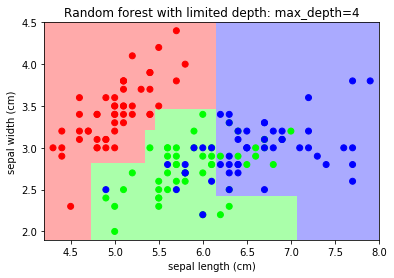

In [ ]:
#El problema con RF es que tiende a sobreajustar los datos.Son lo suficientemente flexibles como para que puedan aprender la estructura del ruido en los datos en lugar de la señal. 
#El modelo obtenido al limitar la profundidad del árbol (max_depth) se ajusta mucho mejor a los datos.
rdm2 = DecisionTreeClassifier(max_depth=4)
rdm2.fit(X,y)
plot_class_map(rdm2, X, y,'Random forest with limited depth: max_depth=4')